In [ ]:
import pandas as pd
import re
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords

## Import Dataset

In [10]:
with open('apple.txt', 'r') as mon_fichier:
    apple = mon_fichier.readlines()
data = pd.DataFrame(apple)
print(data)

                                                     0
0                                LOVE U @APPLE,1.8\t\n
1    Thank you @apple, loving my new iPhone 5S!!!!!...
2    .@apple has the best customer service. In and ...
3    @apple ear pods are AMAZING! Best sound from i...
4    Omg the iPhone 5S is so cool it can read your ...
..                                                 ...
684  At the @Apple store finally getting a new phon...
685  i need a middle finger emoji @apple mAKE ONE,-...
686  Why y'all jerks not puttin the 5s on presale @...
687  .@Apple discontinues Cards app and printing se...
688  With iBeacon, @Apple is going to dump on NFC a...

[689 rows x 1 columns]


Premièrement on doit supprimer les lignes duplicates avec la fonction "drop_duplicates"

In [11]:
data.drop_duplicates(subset=[0], keep='first', inplace=True)
data.head()

,0
0,"LOVE U @APPLE,1.8\t\n"
1,"Thank you @apple, loving my new iPhone 5S!!!!!..."
2,.@apple has the best customer service. In and ...
3,@apple ear pods are AMAZING! Best sound from i...
4,Omg the iPhone 5S is so cool it can read your ...


La stemming et la lemmatisation sont des techniques de normalisation de texte (ou parfois appelées normalisation de mots) 
dans le domaine du traitement du langage naturel qui sont utilisées pour préparer du texte,
des mots et des documents pour un traitement ultérieur.


In [12]:
stemmer = SnowballStemmer('english')
stemmer

In [13]:
for index in range(len(data)):
    data['FirstCleaned'] = data[0].apply(lambda x: " ".join(stemmer.stem(e) for e in re.sub('[^a-zA-Z]', " ", x).split()
                                                      if e not in stopwords.words('english') and len(e)>3).lower())

In [40]:
data['FirstCleaned']

0                                              love appl
1        thank appl love iphon appl iphon twitter xmhjcu
2                          appl best custom servic phone
3                 appl pod amaz best sound headphon ever
4      iphon cool read finger print unlock iphon make...
                             ...                        
684                appl store final get phone real crack
685                    need middl finger emoji appl make
686                              jerk puttin presal appl
687    appl discontinu card print servic recommend us...
688    with ibeacon appl go dump embrac internet thin...
Name: FirstCleaned, Length: 654, dtype: object

la tokenisation se réfère essentiellement à la division d'un plus grand corps de texte en lignes
mots plus petits, ensuite on va calculer la fréquence de chaque mots dans le dataFrame puis on va afficher les mots les plus fréquents

In [48]:
top_N = 25
df = data['FirstCleaned'].str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(df)
word_dist = nltk.FreqDist(words)
DataFrameFrequency = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

In [49]:
DataFrameFrequency.head(25)

,Word,Frequency
0,appl,727
1,iphon,221
2,http,134
3,twitter,69
4,ipad,34
5,phone,32
6,store,31
7,itun,30
8,ipodplayerpromo,25
9,love,23


In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

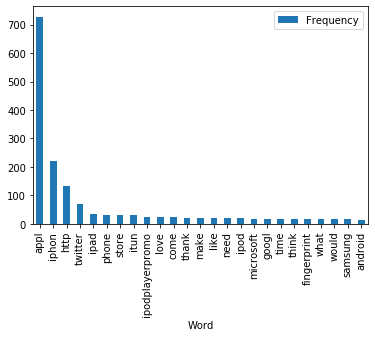

In [63]:
DataFrameFrequency.plot.bar(x='Word', y='Frequency')

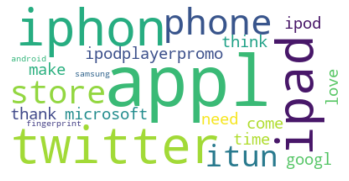

In [77]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
stopwords = set(STOPWORDS)
#text = DataFrameFrequency['Word']

wc = WordCloud(background_color='white', stopwords=stopwords, contour_width=4, contour_color='black', max_words=25)
wc.generate(' '.join(DataFrameFrequency['Word']))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

On conclure que notre dataset se focalise essentiellement sur les produits Apple(appl, ipad, iphon).

In [98]:
from pyspark.ml.feature import NGram
from pyspark.sql import SQLContext

In [85]:
sc = SparkContext.getOrCreate()
sqlContext = SQLContext(sc)
spark_df = sqlContext.createDataFrame(data)
spark_df.show()

+--------------------+--------------------+--------------------+--------------------+
|                   0|        FirstCleaned|            Tokenize|       SecondCleaned|
+--------------------+--------------------+--------------------+--------------------+
| LOVE U @APPLE,1.8	
|           love appl|        [love, appl]|        [love, appl]|
|Thank you @apple,...|thank appl love i...|[thank, appl, lov...|[thank, appl, lov...|
|.@apple has the b...|appl best custom ...|[appl, best, cust...|[appl, best, cust...|
|@apple ear pods a...|appl pod amaz bes...|[appl, pod, amaz,...|[appl, pod, amaz,...|
|Omg the iPhone 5S...|iphon cool read f...|[iphon, cool, rea...|[iphon, cool, rea...|
|the iPhone 5c is ...|   iphon beauti appl|[iphon, beauti, a...|[iphon, beauti, a...|
|#AttributeOwnersh...|attributeownershi...|[attributeownersh...|[attributeownersh...|
|Just checked out ...|just check spec w...|[just, check, spe...|[just, check, spe...|
|I love the new iO...|love much thnx ap...|[love, much

Construire à partir d'une séquence de lettres donnée d'obtenir la fonction de vraisemblance des mots dans le dataset.

In [100]:
ngram = NGram(n = 2, inputCol="SecondCleaned", outputCol="2grams")
ngramDF = ngram.transform(spark_df)

In [92]:
row = ngramDF.select("FirstCleaned", "2grams").collect()[100]

print(row["FirstCleaned"])
print(row["2grams"])

lxforev laurenjessa sleep button slowli die love appl servic happi custom sure bubblemania data polici
['lxforev laurenjessa', 'laurenjessa sleep', 'sleep button', 'button slowli', 'slowli die', 'die love', 'love appl', 'appl servic', 'servic happi', 'happi custom', 'custom sure', 'sure bubblemania', 'bubblemania data', 'data polici']


In [94]:
row = ngramDF.select("FirstCleaned", "2grams").collect()[300]

print(row["FirstCleaned"])
print(row["2grams"])

knew someon drive would send text appl provid feedback imessag prodmktg
['knew someon', 'someon drive', 'drive would', 'would send', 'send text', 'text appl', 'appl provid', 'provid feedback', 'feedback imessag', 'imessag prodmktg']


In [103]:
ngram = NGram(n = 3, inputCol="SecondCleaned", outputCol="3grams")
ngramDF = ngram.transform(spark_df)

In [105]:
row = ngramDF.select("FirstCleaned", "3grams").collect()[100]

print(row["FirstCleaned"])
print(row["3grams"])

lxforev laurenjessa sleep button slowli die love appl servic happi custom sure bubblemania data polici
['lxforev laurenjessa sleep', 'laurenjessa sleep button', 'sleep button slowli', 'button slowli die', 'slowli die love', 'die love appl', 'love appl servic', 'appl servic happi', 'servic happi custom', 'happi custom sure', 'custom sure bubblemania', 'sure bubblemania data', 'bubblemania data polici']


In [106]:
row = ngramDF.select("FirstCleaned", "3grams").collect()[300]

print(row["FirstCleaned"])
print(row["3grams"])

knew someon drive would send text appl provid feedback imessag prodmktg
['knew someon drive', 'someon drive would', 'drive would send', 'would send text', 'send text appl', 'text appl provid', 'appl provid feedback', 'provid feedback imessag', 'feedback imessag prodmktg']


## TF * IDF


## Term Frequency
Le nombre de fois qu'un mot apparaît dans un document divisé par le nombre total de mots dans le document. Chaque document a sa propre fréquence de mandats.

In [108]:
from pyspark.ml.feature import CountVectorizer

Le CountVectorizer de Scikit-learn est utilisé pour convertir une collection de documents texte en un vecteur de nombre de termes / jetons. Il permet également le prétraitement des données textuelles avant de générer la représentation vectorielle. Cette fonctionnalité en fait un module de représentation d'entités très flexible pour le texte.

In [109]:
#countVectorizer = CountVectorizer(inputCol="words_filtred", outputCol="features_tf", vocabSize=2)
countVectorizer = CountVectorizer(inputCol="SecondCleaned", outputCol="features_tf")
model = countVectorizer.fit(spark_df)

In [110]:
print(model.vocabulary)
print(len(model.vocabulary))

['appl', 'iphon', 'http', 'twitter', 'ipad', 'phone', 'store', 'itun', 'ipodplayerpromo', 'love', 'come', 'thank', 'like', 'make', 'need', 'ipod', 'googl', 'microsoft', 'time', 'think', 'samsung', 'fingerprint', 'what', 'would', 'promo', 'android', 'nokia', 'mobil', 'market', 'look', 'pleas', 'releas', 'announc', 'help', 'work', 'next', 'anyon', 'color', 'this', 'back', 'know', 'well', 'devic', 'updat', 'want', 'thing', 'tech', 'sure', 'wait', 'give', 'could', 'innov', 'peopl', 'good', 'get', 'just', 'burberri', 'avail', 'featur', 'differ', 'dear', 'follow', 'upgrad', 'today', 'free', 'alreadi', 'go', 'great', 'emoji', 'year', 'idea', 'wish', 'use', 'touchid', 'will', 'gold', 'ibrooklynb', 'na', 'realli', 'video', 'buff', 'screen', 'best', 'product', 'take', 'that', 'game', 'white', 'done', 'app', 'awesom', 'right', 'better', 'servic', 'news', 'actual', 'gon', 'technolog', 'compani', 'hope', 'guess', 'motorola', 'keynot', 'auto', 'brand', 'watch', 'play', 'black', 'windowsphon', 'seem'

In [113]:
countDF = model.transform(spark_df)
row = countDF.collect()[100]

In [114]:
print(row['FirstCleaned'])
print(row['SecondCleaned'])
print(row['features_tf'])

lxforev laurenjessa sleep button slowli die love appl servic happi custom sure bubblemania data polici
['lxforev', 'laurenjessa', 'sleep', 'button', 'slowli', 'die', 'love', 'appl', 'servic', 'happi', 'custom', 'sure', 'bubblemania', 'data', 'polici']
(2072,[0,9,47,93,197,207,219,280,314,370,456,588,1146,1221,1484],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])


In [116]:
v = row['features_tf']
v.toArray()

array([1., 0., 0., ..., 0., 0., 0.])

## Document Frequency

TFIDF, abréviation de terme fréquence – fréquence inverse des documents, est une statistique numérique qui vise à refléter l'importance d'un mot pour un document dans une collection ou un corpus. Il est souvent utilisé comme facteur de pondération dans les recherches de recherche d'informations, d'exploration de texte et de modélisation utilisateur. La valeur tf – idf augmente proportionnellement au nombre de fois qu'un mot apparaît dans le document et est compensée par le nombre de documents dans le corpus qui contiennent le mot, ce qui permet d'ajuster le fait que certains mots apparaissent plus fréquemment en général. tf – idf est l'un des schémas de pondération des termes les plus populaires aujourd'hui. Une enquête menée en 2015 a montré que 83% des systèmes de recommandation basés sur du texte dans les bibliothèques numériques utilisent tf – idf.

In [119]:
from pyspark.ml.feature import HashingTF, IDF

In [120]:
idf = IDF(inputCol="features_tf", outputCol="features_tf_idf")
idfModel = idf.fit(countDF)

In [121]:
featuresDF = idfModel.transform(countDF)
featuresDF.select("FirstCleaned").show(truncate = False)
featuresDF.select("features_tf_idf").show(truncate = False)

+--------------------------------------------------------------------------------------+
|FirstCleaned                                                                          |
+--------------------------------------------------------------------------------------+
|love appl                                                                             |
|thank appl love iphon appl iphon twitter xmhjcu                                       |
|appl best custom servic phone                                                         |
|appl pod amaz best sound headphon ever                                                |
|iphon cool read finger print unlock iphon make purchas without passcod appl appl      |
|iphon beauti appl                                                                     |
|attributeownership exact appl alway appl market market busi innov                     |
|just check spec wait updat bravo appl                                                 |
|love much thnx appl 

In [122]:
row = featuresDF.collect()[100]

In [123]:
print(row["FirstCleaned"])
print(row["SecondCleaned"])
print(row["features_tf"])
print(row["features_tf_idf"])

lxforev laurenjessa sleep button slowli die love appl servic happi custom sure bubblemania data polici
['lxforev', 'laurenjessa', 'sleep', 'button', 'slowli', 'die', 'love', 'appl', 'servic', 'happi', 'custom', 'sure', 'bubblemania', 'data', 'polici']
(2072,[0,9,47,93,197,207,219,280,314,370,456,588,1146,1221,1484],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])
(2072,[0,9,47,93,197,207,219,280,314,370,456,588,1146,1221,1484],[0.0,3.3065814052873064,3.9997285858472518,4.405193693955416,4.875197323201151,4.875197323201151,4.875197323201151,5.098340874515361,5.098340874515361,5.386022946967143,5.386022946967143,5.386022946967143,5.791488055075306,5.791488055075306,5.791488055075306])
